![Save2Drive](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/save2drive.png)

# Outline

### Introduction
0. Brief introductory reading

### Implement Simple Model
1. Implementation: Preprocessing
2. Implementation: Training the simple model
3. Brief reading about evaluation
4. Implementation: Making predictions
5. Evaluating the simple model
6. Analysis

### Implement Bigram Model
6. Implementation: Preprocessing
7. Implementation: Training the bigram model
8. Implementation: Making predictions
9. Evaluating the bigram model

# 0. Introductory Reading (~5 minutes)

![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification.png)
![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification-2.png)
![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification-3.png)
![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification-4.png)
![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification-5.png)
![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/3-language-identification-6.png)

# 0. Run the cell below to get setup

In [1]:
# Setup - run
import sys, os
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  !rm -r AI4All2020-Michigan-NLP
  !git clone https://github.com/alahnala/AI4All2020-Michigan-NLP.git
  !cp -r AI4All2020-Michigan-NLP/utils/ .
  !cp -r AI4All2020-Michigan-NLP/Data/ .
  !cp -r AI4All2020-Michigan-NLP/slides/ .
  !cp -r AI4All2020-Michigan-NLP/Experiment-Report-Templates/ .
  !echo "=== Files Copied ==="

from utils.lang_detect_helpers import *
from tqdm import tqdm
from collections import Counter

# 1. Preprocessing

## 1.1 Write a preprocess function. Refer to 1-Intro-to-NLP.ipynb for ideas!

Try out different test strings to see how your function works.

In [2]:
def preprocess(sentence):
    '''
    (Template) Implement preprocessing for language detection. Input is a string, and output should be a list of strings.
    '''
    
    # should be a list of strings
    preprocessed_sentence = [sentence]
    
    return preprocessed_sentence 

test_string = 'Hello!! Making a system that can tell me the language of a string of text will unlock many possibilities! :D'
preprocess(test_string)

['Hello!! Making a system that can tell me the language of a string of text will unlock many possibilities! :D']

## 1.2. Run the cells to preprocess each language's text

We imported a data structure called `train`, which is a dictionary. Each key in the dictionary is a language. The value for each language is a list of sentence strings that are in that language.

The second cell below will go through each language and get its `text_list` from the `train` dictionary, then go through each `sentence` in `text_list` and use your preprocessing function on it to get a list of tokens. The `preprocessed_list_of_tokens` will be saved in a new dictionary called `training_data`, which is very similar to `train`.

In [3]:
print("Languages we are training on:", languages)
print("First 3 text strings in English's training set:", train['English'][:3])

Languages we are training on: ['Dutch', 'German', 'English', 'Portuguese', 'French', 'Spanish']
First 3 text strings in English's training set: ['Recent computational studies suggest that early gender shifts may have been motivated by the gender of the corresponding word in Gaulish.', 'For example, the Sequence of Saint Eulalia (878 AD) has past-tense forms such as avret (< Latin habuerat), voldret (< Latin voluerat), alternating with past-tense forms from the Latin perfect (continued as the modern "simple past").', 'Phonology   Old French was constantly changing and evolving; however, the form in the late 12th century, as attested in a great deal of mostly poetic writings, can be considered standard.']


In [4]:
training_data = {}

for language in languages:
    
    training_data[language] = []
    text_list = train[language]
    
    
    for sentence in text_list:
        preprocessed_list_of_tokens = preprocess(sentence)
        training_data[language].append(preprocessed_list_of_tokens)
        
print("First 3 text strings as preprocessed list of tokens in English's training set:", training_data['English'][:3])  

First 3 text strings as preprocessed list of tokens in English's training set: [['Recent computational studies suggest that early gender shifts may have been motivated by the gender of the corresponding word in Gaulish.'], ['For example, the Sequence of Saint Eulalia (878 AD) has past-tense forms such as avret (< Latin habuerat), voldret (< Latin voluerat), alternating with past-tense forms from the Latin perfect (continued as the modern "simple past").'], ['Phonology   Old French was constantly changing and evolving; however, the form in the late 12th century, as attested in a great deal of mostly poetic writings, can be considered standard.']]


## 1.3. Take a brief second to write down the preprocessing steps you are trying (you can use `Preprocessing Experiment 1` slide in Language-Identification-Template)


# 2. Train the model

## 2.1 Implement the `train` function for our simplified model we introduced

Figure out what belongs in the '''TODO''' slots


In [5]:
unigram_dictionaries = {l:{} for l in languages}


def count_tokens(preprocessed_list_of_tokens):
    unigram_counter = defaultdict(lambda:0)
            
    for '''TODO''' in '''TODO''':
        for '''TODO''' in '''TODO''':
            unigram_counter['''TODO'''] += 1
    return unigram_counter


def compute_probabilities(unigram_counts, vocabulary):
    
    unigram_probabilities = defaultdict(lambda:0)
    
    total_unigrams = sum(unigram_counts.values())
    
    
    for unigram in vocabulary:
        
        variable_1 = '''TODO'''
        
        variable_2 = '''TODO'''
        
        unigram_probabilities['''TODO'''] = '''TODO'''
        
    return unigram_probabilities


def train():
    '''
    Implement the train function for our simplified method.
    
    Input: A list of preprocessed strings.
    Output: A dictionary of counts of each string.
    '''
    unigram_counts_per_language = {}
    
    for language in languages:
        
        preprocessed_list_of_tokens = training_data[language]
        
        unigram_counts = count_tokens(preprocessed_list_of_tokens)
        
        unigram_counts_per_language[language] = unigram_counts
        
        
    
    vocabulary = set()

    
    for language in languages:
        
        language_tokens = list(unigram_counts_per_language[language].keys())
        
        
        for token in language_tokens:
            
            vocabulary.add(token)
            

    unigram_probabilities_per_language = {}
    
    for language in languages:
        
        unigram_counts = unigram_counts_per_language[language]
        
        unigram_probabilities = compute_probabilities(unigram_counts, vocabulary)
        
        unigram_probabilities_per_language[language] = unigram_probabilities
            

    return unigram_probabilities_per_language

## 2.1 Run the "train" function on the text of each language.

`unigram_dictionaries` will contain a dictionary for each language with each token's probability of occurring in that language based on our training data.

In [6]:
unigram_dictionaries = train()

# 3. Test Time

We are given a dictionary of text called `test` that looks just like the `train` dictionary from earlier. We want to test how well our model can predict the languages by testing it on those strings--since we know the true answer (we refer to the true answer as the `ground_truth`), we can count the number of strings for which the model predicts the correct language. We then compute the **accuracy** of the model, which is the number correct divided by total number strings we tested. 

### 3.1. `test_data`

The first step is to preprocess the `test` data the same way as we did for the `train` data. We save the preprocessed test data in a list called `test_data`, and we save each sentence's actual language in a list called `ground_truth`.

In [7]:
test_data = []
ground_truth = []

for language in languages:
    
    text_list = test[language]
    
    for sentence in text_list:
        preprocessed_list_of_tokens = preprocess(sentence)
        test_data.append(preprocessed_list_of_tokens)
        ground_truth.append(language)

### 3.2. `ground_truth`

Since we added the test sentences to `test_data` at the same time that we added their languages to `ground_truth`, then the index position in `ground_truth` gives the answer to the string at the same index position in `test_data`. Run the cell below to observe this.

In [8]:
print(ground_truth[0], '-', test_data[0])
print(ground_truth[12], '-', test_data[12])
print(ground_truth[25], '-', test_data[25])
print(ground_truth[40], '-', test_data[40])
print(ground_truth[-13], '-', test_data[-13])
print(ground_truth[-1], '-', test_data[-1])

Dutch - ['Zo is hij niet zoet, maar hartig; er zitten vaak groenten, en/of vlees en vis in en deeg is het belangrijkste ingrediënt.']
German - ['In Europa wird Kuchen traditionell nachmittags zu Kaffee und Kuchen oder zum Sonntagskaffee verzehrt.']
English - ['Kibler, William (1984).']
Portuguese - ['O dispositivo de Babbage se diferenciava por ser programável, algo imprescindível para qualquer computador moderno.']
French - ['Sciences sociales : psychologie, sociologie, économie.']
Spanish - ['Del resto, esta asignatura, así como su aspecto fonético histórico, es obligatoria para los CAPES de letras modernos, agregada a las letras clásicas y a la gramática, concurso que se pasa en Francia para enseñar la lengua y la literatura francesas.']


### 3.3. Random baseline
* Language detection is a **classification task.** In order to believe that a model is actually learns anything, we would want to see significant performance over a **random baseline,** which is a "model" in a sense. This "model" is one that "guesses" the language of each sample randomly.  

* In this project, we have six languages, and our test set has the same number of sentences for each language, so we should expect our **random baseline** model to perform at about 16.67% accuracy. 

* Run the cell below to observe the count of each language's test strings and the random baseline accuracy.

In [9]:
language_count = Counter(ground_truth)

print('Language','|', '# Test Items')
for language, count in language_count.items():
    print(language,'|', count)
print('-' * 15, '\n', 'Total','|', sum(language_count.values()))
print("\nAccuracy of randomly guessing: about {:.2%}".format(Counter(ground_truth)['English']/len(ground_truth)))

Language | # Test Items
Dutch | 12
German | 12
English | 12
Portuguese | 12
French | 12
Spanish | 12
--------------- 
 Total | 72

Accuracy of randomly guessing: about 16.67%


## 3.3 Run `identify_language` on the test strings

Running the cell below will:
- go through each `test_sentence` and run the `identify_language` function on the `test_sentence`
- save the language returned from `identify_language` in a list of `predictions`
- show you the predictions for the first ten `test_sentences` saved in the `predictions` list

In [10]:
def identify_language(test_sentence, languages, unigram_dictionaries):
    '''
    (Solution) Fill in this function to predict the language of test_string
    
    input: test_string, list of our languages, unigram_dicts
    output: one of the languages
    '''
    
    language_probabilities = {language:1 for language in languages} # initialize probabilities to 1
    
    for language in languages: # compute the probability of the test sentence appearing in each language
            
        for token in test_sentence:

            unigram = token

            probability_of_token = unigram_dictionaries[language][unigram]
            language_probabilities[language] = language_probabilities[language] * probability_of_token

    highest_probability_language = get_highest_probability_language(language_probabilities) # pre-written function to get the language with highest probability
    
    return highest_probability_language

predictions = []
for test_sentence in test_data:
    prediction = identify_language(test_sentence, languages, unigram_dictionaries)
    predictions.append(prediction)

print("Predictions for first 10 test sentences:\n", predictions[:10])
print("Ground truth for first 10 test sentences:\n", ground_truth[:10])

Predictions for first 10 test sentences:
 ['Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch']
Ground truth for first 10 test sentences:
 ['Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch', 'Dutch']


# 5. Evaluate your model

## 5.1. Run the cell to call the function `evaluate` 

`evaluate` will compute the accuracy of your model's predictions.

In [11]:
accuracy, data = evaluate(predictions, ground_truth, test_data)
print(accuracy)

Accuracy: 18.06%. 13 out of 72 predictions were correct.


## 5.2. Run the cell below to conceptualize what `data` looks like.

The evaluate function also created a data structure called `data`. For each ground truth language, `data` keeps track of which language each string was predicted as.

In [12]:
show_data_structure(data)

No English strings were predicted to be English


No English strings were predicted to be German


English example predicted to be Dutch:
 ---------------------------------------- 
 ['See also     Notes     References     Further reading     External links   Computer science at Curlie Scholarly Societies in Computer Science What is Computer Science?']


## 5.3. Qualitatively analyze the predictions compared to ground truth 

- Using `data`, we can create a visual to help us perform error analysis.

- Run the cell below to call the function `actual_vs_predicted`. It will output a figure that will show us the number of English samples correctly classified as English, incorrectly classified as German and Dutch, and the same for the other languages. 

- If our model is perfect, the square's diagonal would have `12` in every cell. 

- The function `actual_vs_predicted_text(data)` will output descriptive text for the matrix to help you interpret this matrix.

<Figure size 432x288 with 0 Axes>

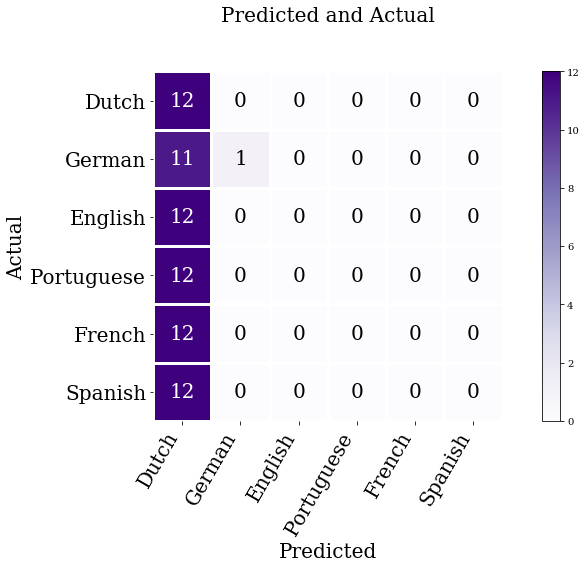

Dutch Sentences 
 --------------------------------------------------
12 Dutch sentences were predicted to be Dutch
0 Dutch sentences were predicted to be German
0 Dutch sentences were predicted to be English
0 Dutch sentences were predicted to be Portuguese
0 Dutch sentences were predicted to be French
0 Dutch sentences were predicted to be Spanish


German Sentences 
 --------------------------------------------------
11 German sentences were predicted to be Dutch
1 German sentences were predicted to be German
0 German sentences were predicted to be English
0 German sentences were predicted to be Portuguese
0 German sentences were predicted to be French
0 German sentences were predicted to be Spanish


English Sentences 
 --------------------------------------------------
12 English sentences were predicted to be Dutch
0 English sentences were predicted to be German
0 English sentences were predicted to be English
0 English sentences were predicted to be Portuguese
0 English sentences

In [13]:
actual_vs_predicted(languages, data)
actual_vs_predicted_text(data)

# 6. Analysis

Did your model operate perfectly? Likely, there are at least a few errors. Use the space below to study the predictions made by your model. Try to answer the following questions with your analysis:

### 1. Are there clear differences between the strings that the model predicted **English** correctly, and the strings the model incorrectly predicted to be **German** for English strings instead?
### 2. Are there clear differences between the strings that the model predicted **English** correctly, and the strings the model incorrectly predicted to be **Dutch** for English strings instead?
### 3. Are there clear differences between the strings that the model predicted **German** correctly, and the strings the model incorrectly predicted to be **English** for German strings instead?
### 4. Are there clear differences between the strings that the model predicted **German** correctly, and the strings the model incorrectly predicted to be **Dutch** for German strings instead?
### 5. Are there clear differences between the strings that the model predicted **Dutch** correctly, and the strings the model incorrectly predicted to be **English** for Dutch strings instead?
### 6. Are there clear differences between the strings that the model predicted **Dutch** correctly, and the strings the model incorrectly predicted to be **German** for Dutch strings instead?
### 7. If you were to modify your preprocessing steps, what do you think you could do to improve the model?
### 8. Can you think of another possible model for language detection that might work better?
